In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bgg_data = pd.read_excel('BGG_Data_Set.xlsx')
bgg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [3]:
bgg_data.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79244,1,3.8604,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61278,2,2.8405,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66337,3,3.9129,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43254,4,3.2406,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.69649,5,4.2219,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [4]:
bgg_data.isnull().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [5]:
bgg_data[bgg_data.ID.isnull()]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
10776,NaN,Ace of Aces: Jet Eagles,1990.0,2,2,20,10,110,6.259,10778,1.88,NaN,NaN,NaN
10835,NaN,Die Erben von Hoax,1999.0,3,8,45,12,137,6.048,10837,2.15,NaN,NaN,NaN
11152,NaN,Rommel in North Africa: The War in the Desert ...,1986.0,2,2,0,12,53,6.758,11154,3.63,NaN,NaN,NaN
11669,NaN,Migration: A Story of Generations,2012.0,2,4,30,12,49,7.199,11671,2.00,NaN,NaN,NaN
12649,NaN,Die Insel der steinernen Wachter,2009.0,2,4,120,12,49,6.727,12651,3.14,NaN,NaN,NaN
12764,NaN,Dragon Ball Z TCG (2014 edition),2014.0,2,2,20,8,33,7.030,12766,2.50,NaN,NaN,NaN
13282,NaN,Dwarfest,2014.0,2,6,45,12,82,6.126,13284,1.75,NaN,NaN,NaN
13984,NaN,Hus,NaN,2,2,40,0,38,6.284,13986,1.50,NaN,NaN,NaN
14053,NaN,Contrario 2,2006.0,2,12,0,14,37,6.300,14055,1.00,NaN,NaN,NaN
14663,NaN,Warage: Extended Edition,2017.0,2,6,90,10,49,7.643,14665,3.00,NaN,NaN,NaN


Seeing as there were only 16 IDs missing, I set out to look online on how to replace the null values and I found out that the ID numbers are available online on the https://boardgamegeek.com/ site. When a specific boardgame is searched for a selected on the site, the url will say for example https://boardgamegeek.com/boardgame/1991/ace-aces-jet-eagles. The number before the board game title is the ID number.(1991) Seeing this, I replaced all the ID numbers for the null values as it is important to have all the ID values.

In [6]:
bgg_data.loc[10776, 'ID']

nan

In [7]:
bgg_data.loc[10776, 'ID'] = 1991

In [8]:
bgg_data.loc[10776, 'ID']

1991.0

In [9]:
bgg_data.loc[10835, 'ID'] = 413
bgg_data.loc[11152, 'ID'] =11113
bgg_data.loc[11669, 'ID'] =143663
bgg_data.loc[12649, 'ID'] =54501
bgg_data.loc[12764, 'ID'] =168077
bgg_data.loc[13282, 'ID'] =170337
bgg_data.loc[13984, 'ID'] =25999
bgg_data.loc[14053, 'ID'] =27227
bgg_data.loc[14663, 'ID'] =198886
bgg_data.loc[16292, 'ID'] =73574
bgg_data.loc[17009, 'ID'] =148211
bgg_data.loc[18672, 'ID'] =269573
bgg_data.loc[19332, 'ID'] =8173
bgg_data.loc[19474, 'ID'] =316555
bgg_data.loc[20040, 'ID'] =15804

In [10]:
bgg_data[bgg_data.ID.isnull()]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains


In [11]:
bgg_data[bgg_data["Year Published"].isnull()]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
13984,25999.0,Hus,NaN,2,2,40,0,38,6.284,13986,1.5,NaN,NaN,NaN


There is only a single value where the Year Published is unknown so I made the default value to be 0 to see the histogram to see if there were any significant outliers.

In [12]:
bgg_data.loc[13984, 'Year Published'] =0

<AxesSubplot:>

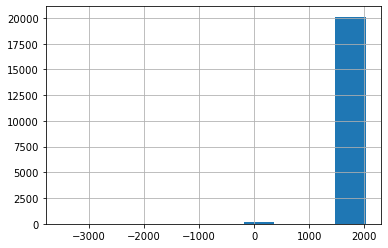

In [13]:
bgg_data["Year Published"].hist()

The data all seems to be within a plausible range with no outliers other than the single 0. Therefore we can move on and clean the other null values.

In [14]:
bgg_data.isnull().sum()

ID                        0
Name                      0
Year Published            0
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

We notice that Owned Users, Mechanics, and Domains have null values still. Owned users is an integer and it is not possible to have 0 owned users so we will set that as the default value. Since there are only 23 null values, there should not be that many null values and will will check with a histogram.

In [15]:
bgg_data['Owned Users'] = bgg_data['Owned Users'].fillna(0)

In [16]:
bgg_data.isnull().sum()

ID                        0
Name                      0
Year Published            0
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users               0
Mechanics              1598
Domains               10159
dtype: int64

<AxesSubplot:>

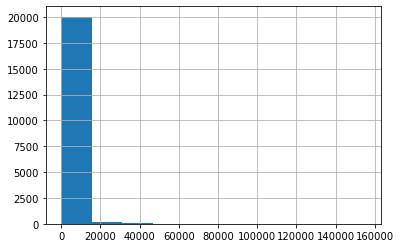

In [17]:
bgg_data["Owned Users"].hist()

Looking at the histogram, the data is within the plausible range of data. Therefore we move on to mechanics and domains, This section is all strings and being null means that the mechanics or the domain in which the boardgame is unknown. We will just put unknown as the default value as we can still use that to see whether having these values influence the rank of the board game.

In [18]:
bgg_data['Mechanics'] = bgg_data['Mechanics'].fillna('Unknown')
bgg_data['Domains'] = bgg_data['Domains'].fillna('Unknown')

In [19]:
bgg_data.isnull().sum()

ID                    0
Name                  0
Year Published        0
Min Players           0
Max Players           0
Play Time             0
Min Age               0
Users Rated           0
Rating Average        0
BGG Rank              0
Complexity Average    0
Owned Users           0
Mechanics             0
Domains               0
dtype: int64

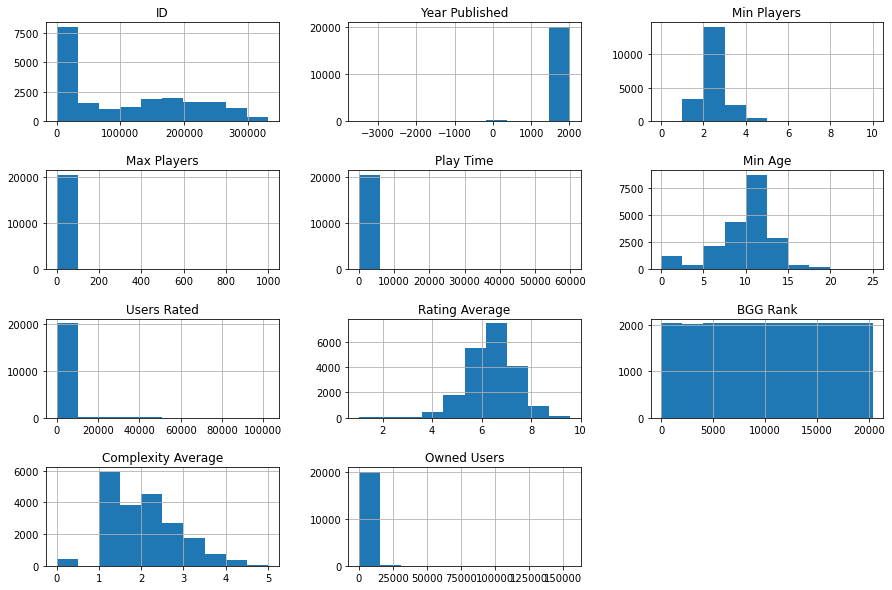

In [34]:
bgg_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Looking at the histograms, the data seems overall reasonable and with little to no outliers that will affect the data negatively. 

In [20]:
bgg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20343 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20343 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20343 non-null  float64
 12  Mechanics           20343 non-null  object 
 13  Domains             20343 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


At this point, I wish to find the unique values that are in Mechanics and Domains as I will use which keywords affect rank the most or whether there is a trend there.

In [21]:
temp = bgg_data['Domains'].str.split(',').to_numpy()
d_unique=np.unique(sum(temp, []))
temp = bgg_data['Mechanics'].str.split(',').to_numpy()
m_unique=np.unique(sum(temp, []))

In [22]:
print(d_unique)
print(m_unique)

[" Children's Games" ' Customizable Games' ' Family Games' ' Party Games'
 ' Strategy Games' ' Thematic Games' ' Wargames' 'Abstract Games'
 "Children's Games" 'Customizable Games' 'Family Games' 'Party Games'
 'Strategy Games' 'Thematic Games' 'Unknown' 'Wargames']
[' Action Points' ' Action Queue' ' Action Retrieval' ' Action Timer'
 ' Action/Event' ' Advantage Token' ' Alliances'
 ' Area Majority / Influence' ' Area Movement' ' Area-Impulse'
 ' Auction/Bidding' ' Auction: Dexterity' ' Auction: Dutch'
 ' Auction: Dutch Priority' ' Auction: English'
 ' Auction: Fixed Placement' ' Auction: Once Around'
 ' Auction: Sealed Bid' ' Auction: Turn Order Until Pass'
 ' Automatic Resource Growth' ' Betting and Bluffing' ' Bias' ' Bingo'
 ' Bribery' ' Campaign / Battle Card Driven' ' Card Drafting'
 ' Card Play Conflict Resolution' ' Catch the Leader' ' Chaining'
 ' Chit-Pull System' ' Closed Economy Auction' ' Command Cards'
 ' Commodity Speculation' ' Communication Limits' ' Connections'
 ' C

Here I check to see whether all the values are unique as to see if there are any duplicate board games.

In [32]:
bgg_data['ID'].value_counts().head()

207487.0    1
42131.0     1
283073.0    1
33023.0     1
35219.0     1
Name: ID, dtype: int64

Oveerall, I think my data is cleaned up with no null values and with suitable replacements. I have checked for outliers in the histograms and the data seems to be ready.